# Import Libraries and Load Data

In [1]:
pip install --upgrade scikit-learn

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/fetal_health.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [7]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [8]:
#Check for null Values
df.isna().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


In [9]:
# Check class distribution
print("\nClass Distribution:")
df['fetal_health'].value_counts()


Class Distribution:


,count
fetal_health,
1.0,1655
2.0,295
3.0,176


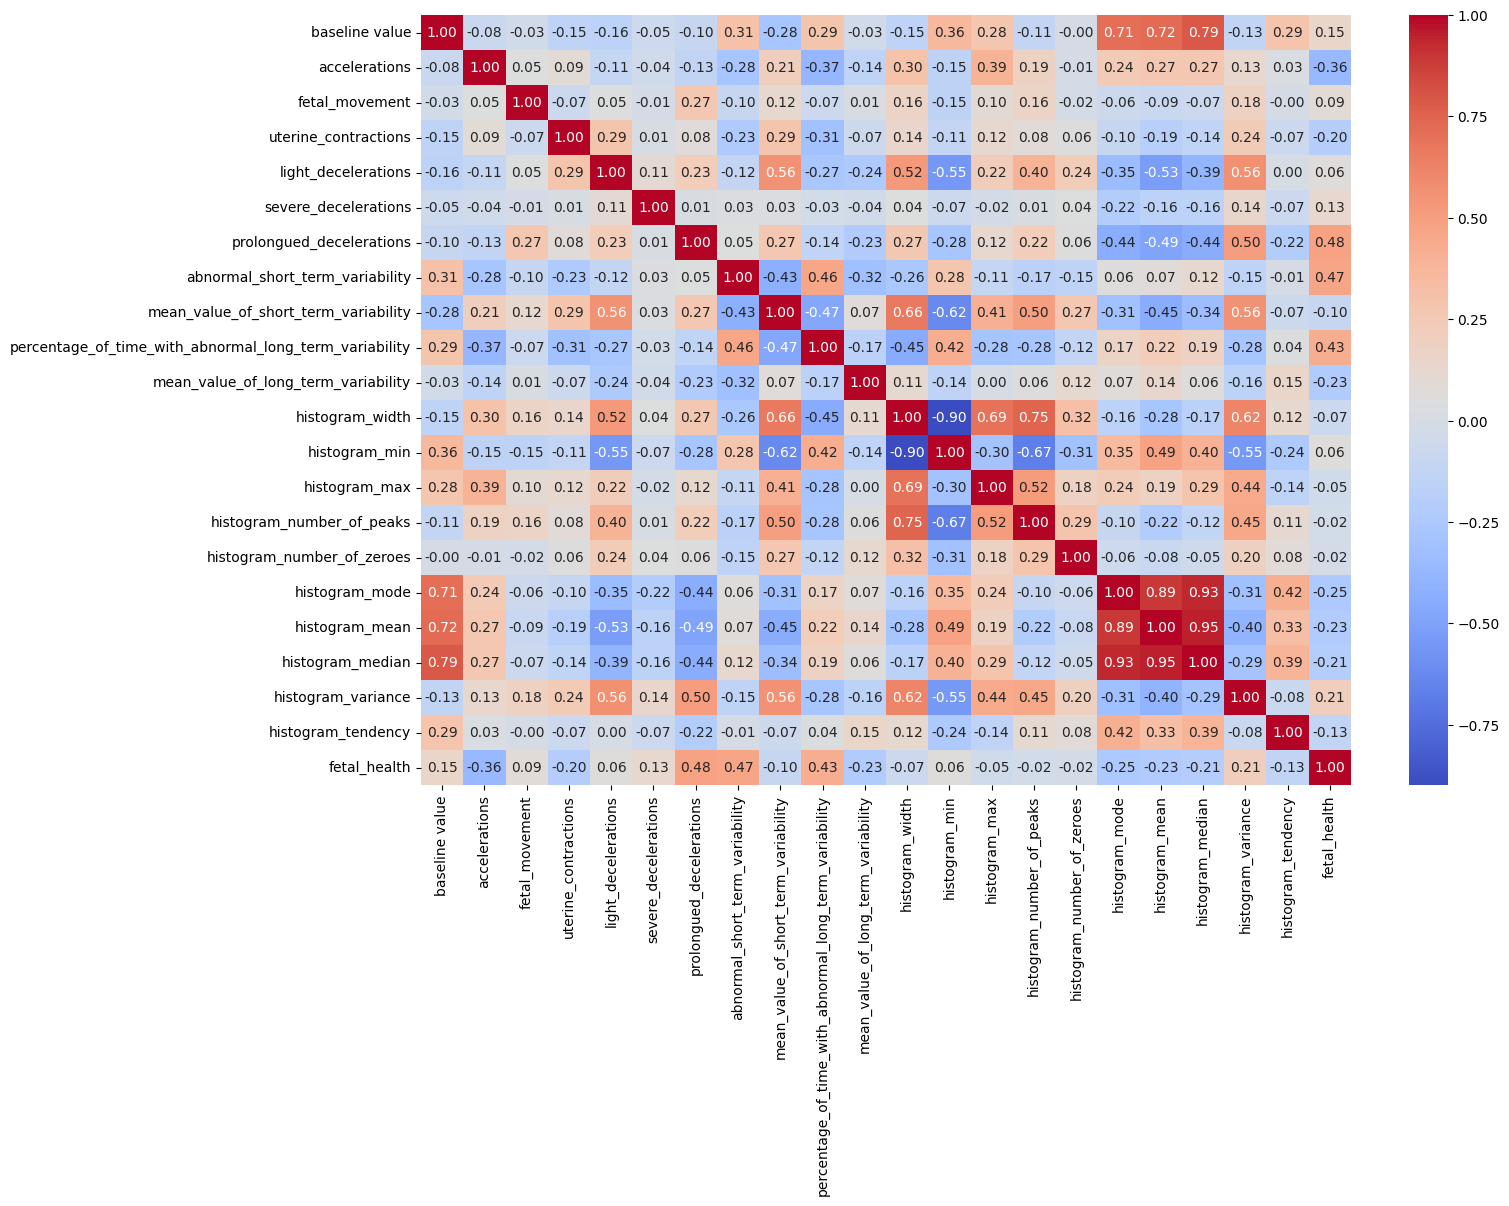

In [10]:
# Correlation analysis to identify redundant features
import  seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [11]:
# Separate features and target
X = df.drop(columns=['fetal_health'])
y = df['fetal_health']

 # Feature Selection


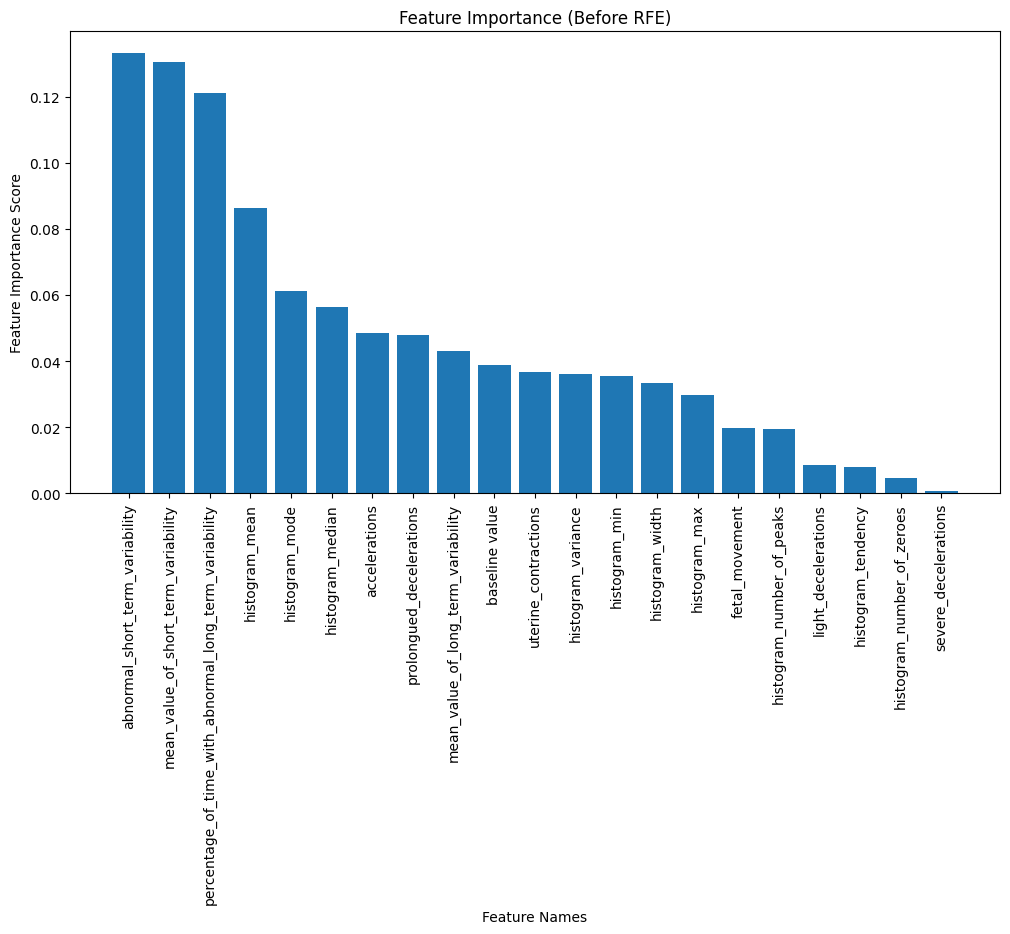

In [12]:
# 1 Feature Importance Graph BEFORE RFE (All Features)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(X.columns)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(X.columns)), X.columns[sorted_idx], rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance (Before RFE)')
plt.show()

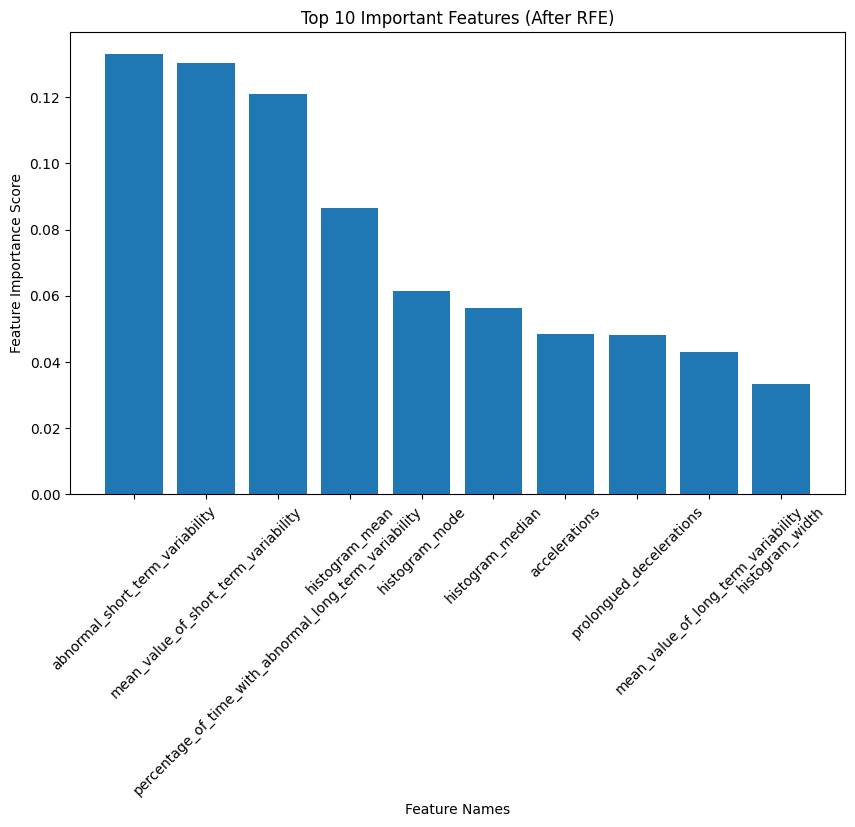

In [13]:
# 2 Feature Selection Using RFE
rfe_selector = RFE(rf_model, n_features_to_select=10)
X_selected = rfe_selector.fit_transform(X, y)
selected_features = X.columns[rfe_selector.support_]

# 3 Feature Importance Graph AFTER RFE (Selected Features)
selected_importance = feature_importance[rfe_selector.support_]
sorted_idx_selected = np.argsort(selected_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), selected_importance[sorted_idx_selected], align='center')
plt.xticks(range(len(selected_features)), np.array(selected_features)[sorted_idx_selected], rotation=45)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance Score')
plt.title('Top 10 Important Features (After RFE)')
plt.show()

In [14]:
# 4 Apply SMOTE (Balancing the Classes)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# 5 Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# 6 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [15]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))  # Check if classes are balanced

{1.0: 1324, 2.0: 1324, 3.0: 1324}


Base Models

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



 Logistic Regression Metrics
              precision    recall  f1-score   support

         1.0       0.92      0.85      0.89       331
         2.0       0.78      0.85      0.81       331
         3.0       0.86      0.85      0.85       331

    accuracy                           0.85       993
   macro avg       0.86      0.85      0.85       993
weighted avg       0.86      0.85      0.85       993



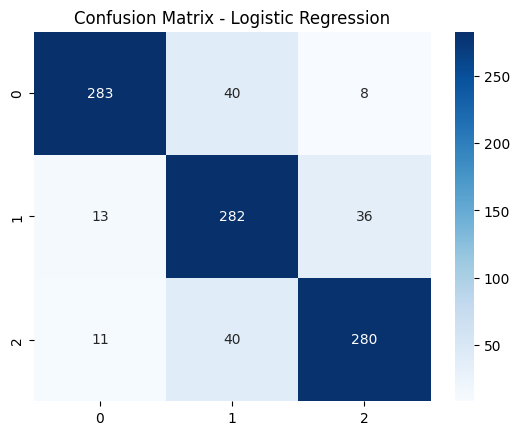

In [16]:
# Machine Learning Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
import lightgbm as lgbm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n Logistic Regression Metrics")
print(classification_report(y_test, y_pred_log))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


 KNN Metrics
              precision    recall  f1-score   support

         1.0       1.00      0.91      0.95       331
         2.0       0.91      0.99      0.95       331
         3.0       0.99      0.98      0.99       331

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



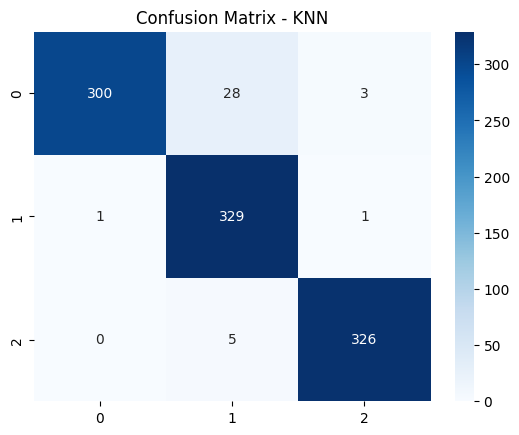

In [17]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("\n KNN Metrics")
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()


 Naïve Bayes Metrics
              precision    recall  f1-score   support

         1.0       0.91      0.79      0.85       331
         2.0       0.69      0.86      0.76       331
         3.0       0.86      0.75      0.80       331

    accuracy                           0.80       993
   macro avg       0.82      0.80      0.80       993
weighted avg       0.82      0.80      0.80       993



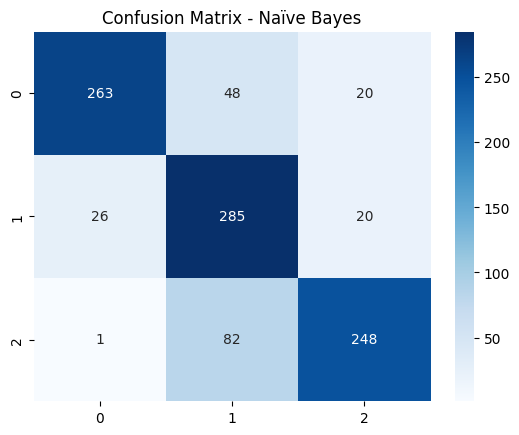

In [18]:
#  Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("\n Naïve Bayes Metrics")
print(classification_report(y_test, y_pred_nb))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()


 SVM Metrics
              precision    recall  f1-score   support

         1.0       0.94      0.86      0.90       331
         2.0       0.80      0.88      0.84       331
         3.0       0.88      0.86      0.87       331

    accuracy                           0.87       993
   macro avg       0.87      0.87      0.87       993
weighted avg       0.87      0.87      0.87       993



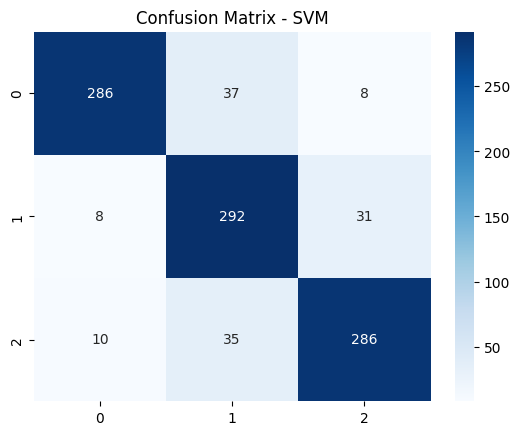

In [19]:
#  Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\n SVM Metrics")
print(classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()


 Decision Tree Metrics
              precision    recall  f1-score   support

         1.0       0.96      0.93      0.94       331
         2.0       0.93      0.96      0.94       331
         3.0       0.99      0.99      0.99       331

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



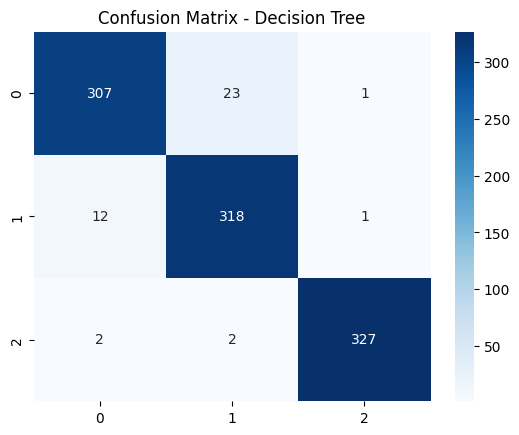

In [20]:
#  Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\n Decision Tree Metrics")
print(classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Ensemble Models


 Random Forest Metrics
              precision    recall  f1-score   support

         1.0       0.98      0.95      0.96       331
         2.0       0.94      0.98      0.96       331
         3.0       0.99      0.99      0.99       331

    accuracy                           0.97       993
   macro avg       0.97      0.97      0.97       993
weighted avg       0.97      0.97      0.97       993



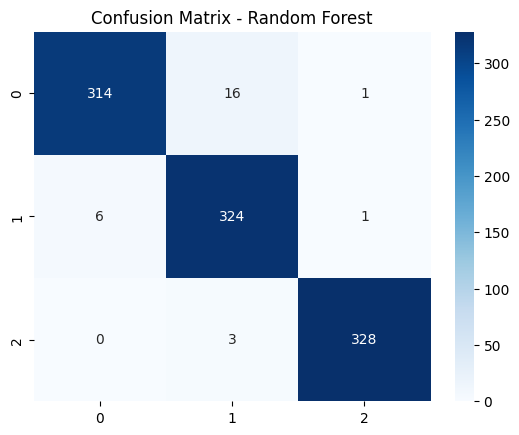

In [21]:
#  Random Forest (Bagging)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n Random Forest Metrics")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


 Gradient Boosting Metrics
              precision    recall  f1-score   support

         1.0       0.97      0.92      0.95       331
         2.0       0.92      0.98      0.95       331
         3.0       1.00      0.99      0.99       331

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



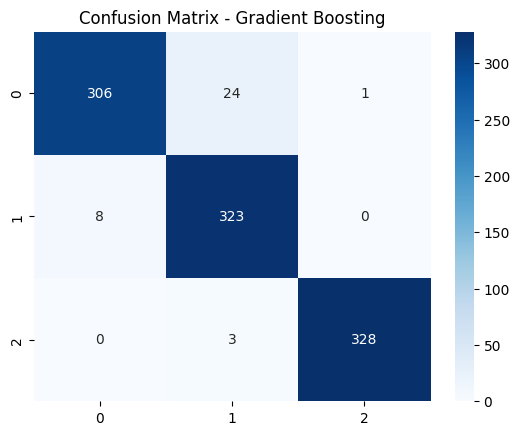

In [22]:
#  Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("\n Gradient Boosting Metrics")
print(classification_report(y_test, y_pred_gb))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


 AdaBoost Metrics
              precision    recall  f1-score   support

         1.0       0.95      0.78      0.86       331
         2.0       0.81      0.97      0.88       331
         3.0       0.99      0.97      0.98       331

    accuracy                           0.91       993
   macro avg       0.92      0.91      0.91       993
weighted avg       0.92      0.91      0.91       993



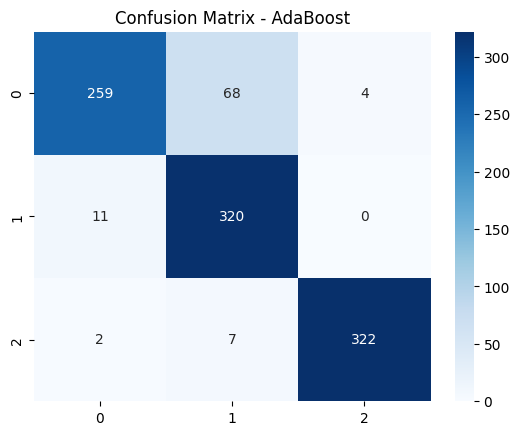

In [23]:
#  AdaBoost Model
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

print("\n AdaBoost Metrics")
print(classification_report(y_test, y_pred_adaboost))
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - AdaBoost")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2546
[LightGBM] [Info] Number of data points in the train set: 3972, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 LightGBM Metrics
              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97       331
         2.0       0.96      0.98      0.97       331
         3.0       1.00      0.99      1.00       331

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993



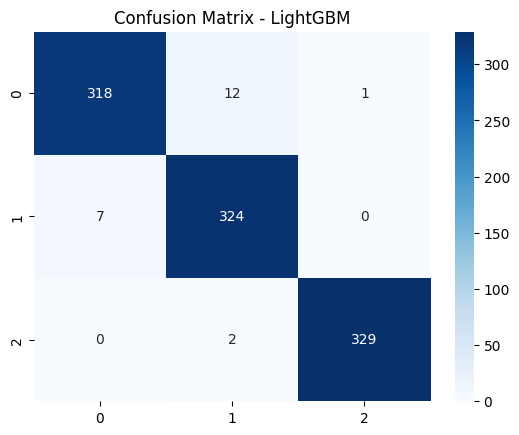

In [24]:
#  LightGBM
lgb_model = lgbm.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("\n LightGBM Metrics")
print(classification_report(y_test, y_pred_lgb))
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - LightGBM")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2546
[LightGBM] [Info] Number of data points in the train set: 3972, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Voting Classifier Metrics
              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97       331
         2.0       0.96      0.97      0.97       331
         3.0       1.00      0.99      0.99       331

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993



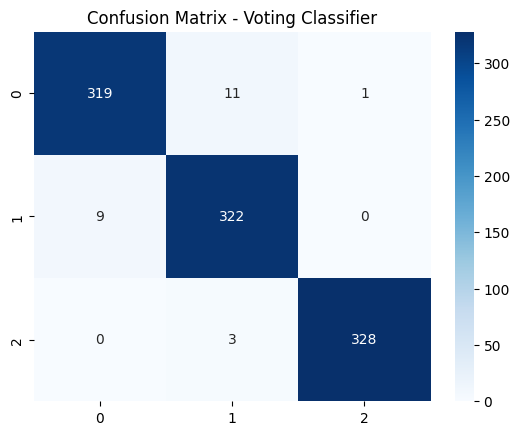

In [25]:
# Voting Classifier (Majority Voting)
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('lgb', lgb_model)], voting='hard')
voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)

print("\n Voting Classifier Metrics")
print(classification_report(y_test, y_pred_voting))
sns.heatmap(confusion_matrix(y_test, y_pred_voting), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Voting Classifier")
plt.show()

Model Comparison

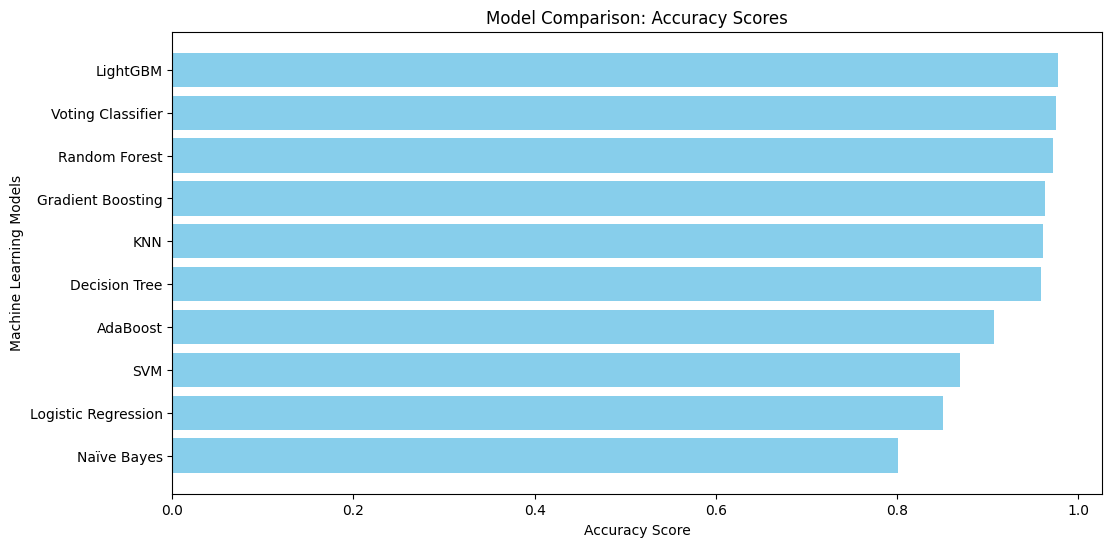

In [26]:
# Collect model names and their accuracy scores
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Naïve Bayes": accuracy_score(y_test, y_pred_nb),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),
    "LightGBM": accuracy_score(y_test, y_pred_lgb),
    "AdaBoost": accuracy_score(y_test, y_pred_adaboost),
    "Voting Classifier": accuracy_score(y_test, y_pred_voting)
}

# Sort models by accuracy
sorted_models = sorted(models.items(), key=lambda x: x[1], reverse=True)

# Plot accuracy scores
plt.figure(figsize=(12, 6))
plt.barh([m[0] for m in sorted_models], [m[1] for m in sorted_models], color='skyblue')
plt.xlabel("Accuracy Score")
plt.ylabel("Machine Learning Models")
plt.title("Model Comparison: Accuracy Scores")
plt.gca().invert_yaxis()  # Highest accuracy at the top
plt.show()


Accuracy Comparison Graph

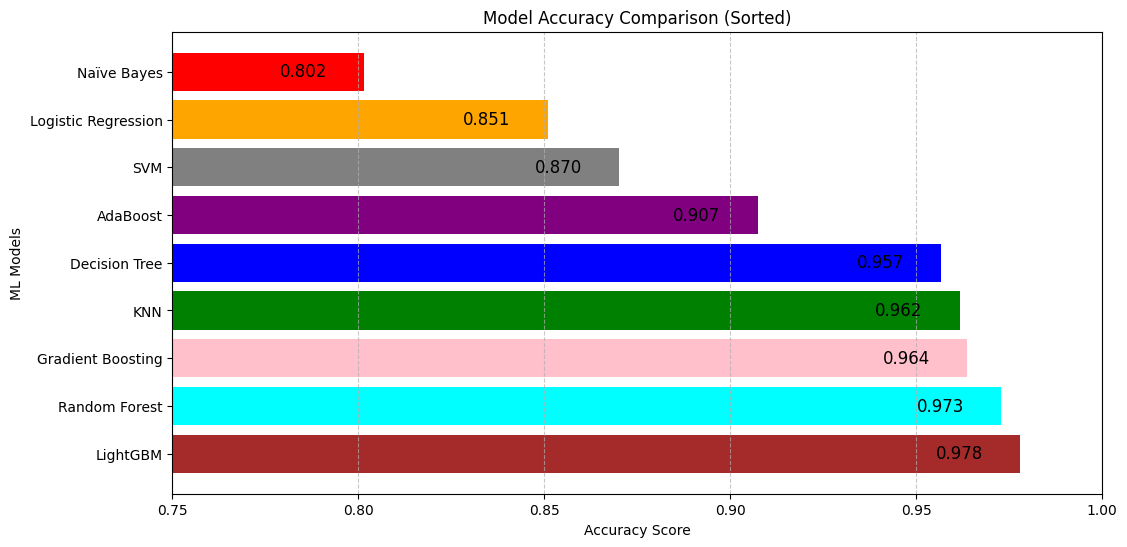

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values from your project
models = ["Logistic Regression", "KNN", "Naïve Bayes", "SVM", "Decision Tree",
          "Random Forest", "Gradient Boosting", "LightGBM", "AdaBoost"]
accuracies = [0.850957, 0.961732, 0.801611, 0.870091, 0.956697,
              0.972810, 0.963746, 0.977845, 0.907351]

# Sort models based on accuracy in descending order
sorted_indices = np.argsort(accuracies)[::-1]  # Sort in descending order
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar chart
plt.barh(sorted_models, sorted_accuracies, color=['brown', 'cyan', 'pink', 'green', 'blue', 'purple', 'gray', 'orange', 'red'])

# Add labels and title
plt.xlabel("Accuracy Score")
plt.ylabel("ML Models")
plt.title("Model Accuracy Comparison (Sorted)")

# Show accuracy values on bars
for index, value in enumerate(sorted_accuracies):
    plt.text(value - 0.01, index, f"{value:.3f}", va='center', ha='right', fontsize=12, color='black')

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0.75, 1.0)  # Adjust x-axis range
plt.show()


# Comparing accuracy and precison

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 Model Performance Comparison
                     Accuracy  Precision
Logistic Regression  0.850957   0.855009
KNN                  0.961732   0.964465
Naïve Bayes          0.801611   0.818252
SVM                  0.870091   0.874329
Decision Tree        0.958711   0.959140
Random Forest        0.972810   0.973265
Gradient Boosting    0.963746   0.964780
LightGBM             0.977845   0.978004
AdaBoost             0.907351   0.916688
Voting Classifier    0.975831   0.975952


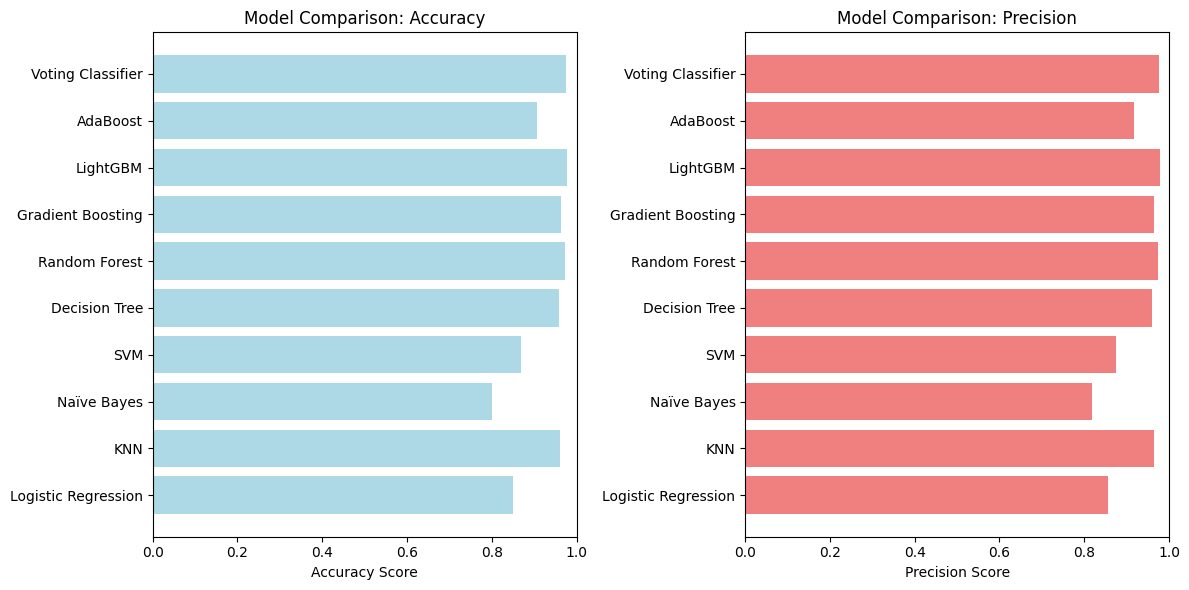

In [28]:
from sklearn.metrics import precision_score

# Dictionary to store model performances
model_results = {}

# Define all models
models = {
    "Logistic Regression": log_model,
    "KNN": knn_model,
    "Naïve Bayes": nb_model,
    "SVM": svm_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "LightGBM": lgb_model,
    "AdaBoost": adaboost_model,
    "Voting Classifier": voting_model
}

# Compute accuracy & precision for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multi-class
    model_results[name] = {"Accuracy": accuracy, "Precision": precision}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(model_results).T
print("\n Model Performance Comparison")
print(results_df)

# Plot Accuracy & Precision Comparison Graph
plt.figure(figsize=(12, 6))

# Accuracy Bar Chart
plt.subplot(1, 2, 1)
plt.barh(results_df.index, results_df["Accuracy"], color='lightblue')
plt.xlabel("Accuracy Score")
plt.title("Model Comparison: Accuracy")
plt.xlim(0, 1)

# Precision Bar Chart
plt.subplot(1, 2, 2)
plt.barh(results_df.index, results_df["Precision"], color='lightcoral')
plt.xlabel("Precision Score")
plt.title("Model Comparison: Precision")
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

# ROC Comparison

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


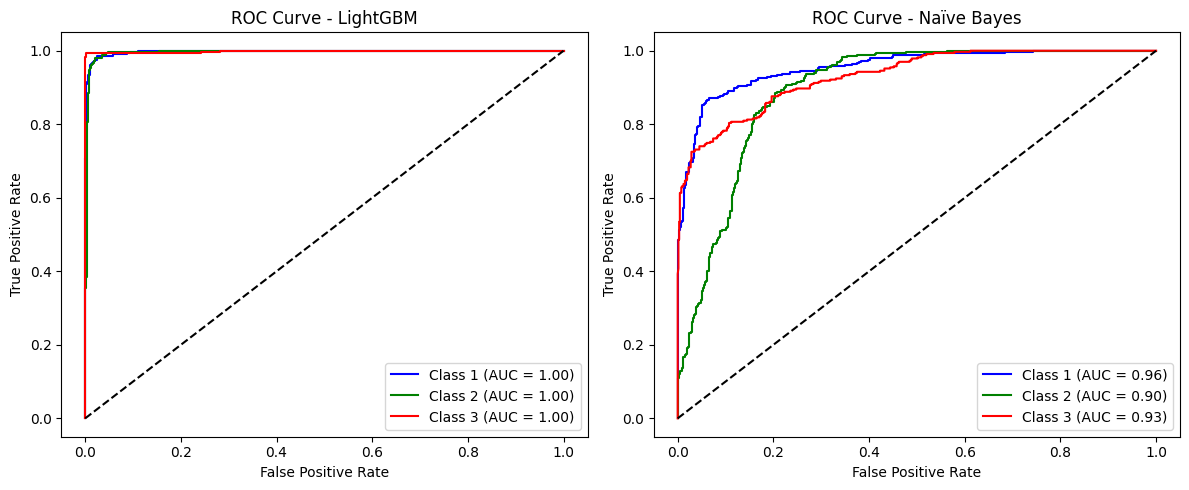

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels for multi-class classification (One-vs-Rest strategy)
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_score_lgb = lgb_model.predict_proba(X_test)
y_score_nb = nb_model.predict_proba(X_test)

# Define colors for different classes
colors = cycle(["blue", "green", "red"])

plt.figure(figsize=(12, 5))

# =======  LightGBM ROC Curve =======
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_lgb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], "k--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM")
plt.legend(loc="lower right")

# =======  Naïve Bayes ROC Curve =======
plt.subplot(1, 2, 2)
colors = cycle(["blue", "green", "red"])  # Reset colors
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_nb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'Class {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], "k--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


#Stacking Classifier - Strong & Weak Models

In [30]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=100, random_state=42))
]

# Meta-model (final decision maker)
meta_model = LogisticRegression()

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluate model
y_pred_stack = stacking_clf.predict(X_test)

# Print accuracy and precision
from sklearn.metrics import accuracy_score, precision_score

print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Stacking Classifier Precision:", precision_score(y_test, y_pred_stack, average='weighted'))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2546
[LightGBM] [Info] Number of data points in the train set: 3972, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2529
[LightGBM] [Info] Number of data points in the train set: 3177, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2531
[LightGBM] [Info] Number of data points in the train set: 3177, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2532
[LightGBM] [Info] Number of data points in the train set: 3178, number of used features: 10
[LightGBM] [Info] Start training from score -1.098927
[LightGBM] [Info] Start training from score -1.098927
[LightGBM] [Info] Start training from score -1.097983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 3178, number of used features: 10
[LightGBM] [Info] Start training from score -1.098927
[LightGBM] [Info] Start training from score -1.097983
[LightGBM] [Info] Start training from score -1.098927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 3178, number of used features: 10
[LightGBM] [Info] Start training from score -1.097983
[LightGBM] [Info] Start training from score -1.098927
[LightGBM] [Info] Start training from score -1.098927
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Stacking Classifier Accuracy: 0.9798590130916415
Stacking Classifier Precision: 0.98001554001554


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Analysis

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2552
[LightGBM] [Info] Number of data points in the train set: 3972, number of used features: 15
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Stacking Classifier Accuracy: 0.9697885196374623
Stacking Classifier Precision: 0.9702816051452781

Classification Report:
               precision    recall  f1-score   support

         1.0       0.97      0.94      0.96       331
         2.0       0.94      0.98      0.96       331
         3.0       1.00      0.99      1.00       331

    accuracy                           0.97       993
   macro avg       0.97      0.97      0.97       993
weighted avg       0.97      0.97      0.97       993



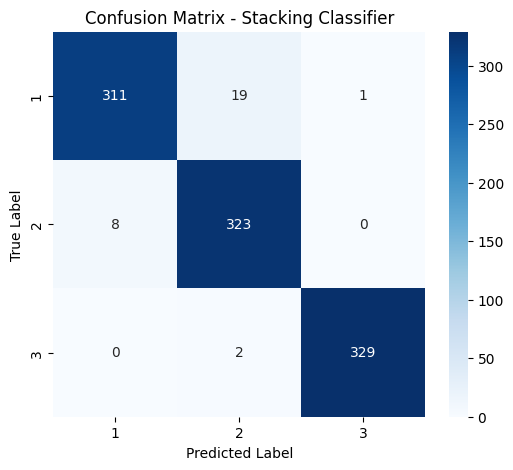

In [31]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('nb', GaussianNB()),
    ('svm', SVC(probability=True, random_state=42))
]

# Define meta-model
meta_model = LGBMClassifier(n_estimators=100, random_state=42)

# Create Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Stacking Classifier Accuracy:", accuracy)
print("Stacking Classifier Precision:", precision)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()


#Stacking Classifier with RF, GB, SVM & LR.

In [49]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Define Base Models (Stronger Models)
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)),
    ('svm', SVC(probability=True, kernel='rbf', C=1.0, random_state=42))
]

# Meta-Model (Simple but Effective)
meta_model = LogisticRegression()

# Define Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Train Stacking Model
stacking_clf.fit(X_train, y_train)

# Predictions
y_pred = stacking_clf.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Stacking Classifier Accuracy: {accuracy:.4f}")
print(f"Stacking Classifier Precision: {precision:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Stacking Classifier Accuracy: 0.9758
Stacking Classifier Precision: 0.9761

Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.95      0.97       331
         2.0       0.95      0.98      0.97       331
         3.0       1.00      0.99      1.00       331

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993



# Stacking Classifier with Low-Accuracy Models(LR, NB, KNN, DT)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define base models (low accuracy models)
base_models = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Define meta-model (final model)
meta_model = SVC(probability=True, random_state=42)

# Create Stacking Classifier
stacking_clf_low = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the model
stacking_clf_low.fit(X_train, y_train)

# Predictions
y_pred = stacking_clf_low.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print("Stacking Classifier (Low Accuracy Models) Accuracy:", accuracy)
print("Stacking Classifier (Low Accuracy Models) Precision:", precision)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Stacking (Low Accuracy Models)")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Stacking Classifier with High-Performance Models (RF, Gradient Boosting, LightGBM)

 Stacking Classifier (High-Performance Models) Accuracy: 0.9798590130916415
 Stacking Classifier (High-Performance Models) Precision: 0.98001554001554


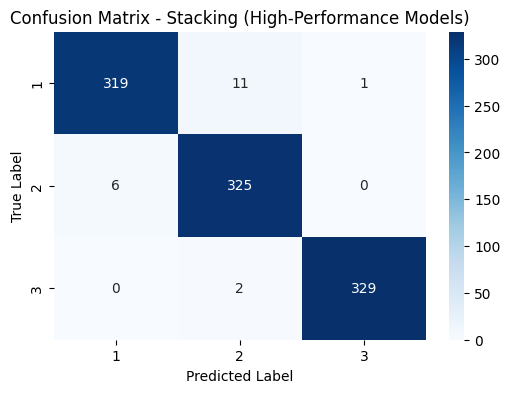


🔹 Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.96      0.97       331
         2.0       0.96      0.98      0.97       331
         3.0       1.00      0.99      1.00       331

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993



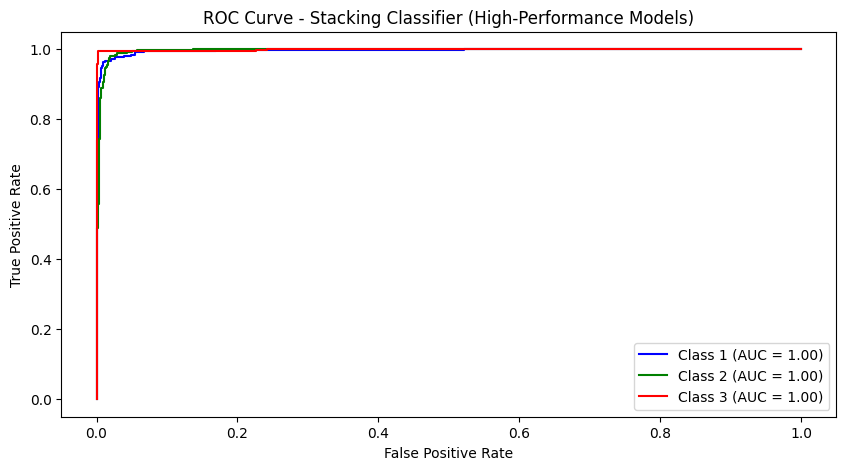

In [50]:
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# 🔹 Suppress Warnings (LightGBM & Deprecation Warnings)
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

# Apply Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Step 1: Define High-Performance Base Models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=100, random_state=42, verbose=-1))  # Suppress LGBM warnings
]

# 🔹 Step 2: Define Meta-Model
meta_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# 🔹 Step 3: Create & Train Stacking Classifier
stacking_clf_high = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_clf_high.fit(X_train, y_train)

# 🔹 Step 4: Make Predictions
y_pred_high = stacking_clf_high.predict(X_test)

# 🔹 Step 5: Evaluate Performance
accuracy_high = accuracy_score(y_test, y_pred_high)
precision_high = precision_score(y_test, y_pred_high, average='weighted')

print(" Stacking Classifier (High-Performance Models) Accuracy:", accuracy_high)
print(" Stacking Classifier (High-Performance Models) Precision:", precision_high)

# 🔹 Step 6: Confusion Matrix
conf_matrix_high = confusion_matrix(y_test, y_pred_high)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_high, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Stacking (High-Performance Models)")
plt.show()

# 🔹 Step 7: Classification Report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_high))

# 🔹 Step 8: Generate ROC Curve for Multi-Class Classification
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])  # Convert labels into binary format
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_score_stacking = stacking_clf_high.predict_proba(X_test)

# Define colors for classes
colors = cycle(["blue", "green", "red"])

plt.figure(figsize=(10, 5))

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_stacking[:, i])
    plt.plot(fpr, tpr, color=color, label=f'Class {i+1} (AUC = {auc(fpr, tpr):.2f})')

plt.title("ROC Curve - Stacking Classifier (High-Performance Models)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# Comparison graph

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define model names and their corresponding performance
models = ['Weak Stacking', 'Strong Stacking']
accuracy_scores = [accuracy, accuracy_high]  # Replace with actual values
precision_scores = [precision, precision_high]  # Replace with actual values

# Set bar width
bar_width = 0.3

# X locations for bars
x = np.arange(len(models))

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - bar_width/2, accuracy_scores, bar_width, label='Accuracy', color='blue')
bars2 = ax.bar(x + bar_width/2, precision_scores, bar_width, label='Precision', color='green')

# Add labels and title
ax.set_xlabel('Stacking Classifier Models')
ax.set_ylabel('Performance Score')
ax.set_title('Comparison: Weak vs. Strong Stacking Classifier')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Show plot
plt.show()


# Hyperparameter Tuning for Stacking Classifier

 Optimized Stacking Classifier Accuracy: 0.9748237663645518
 Optimized Stacking Classifier Precision: 0.9749506497499434


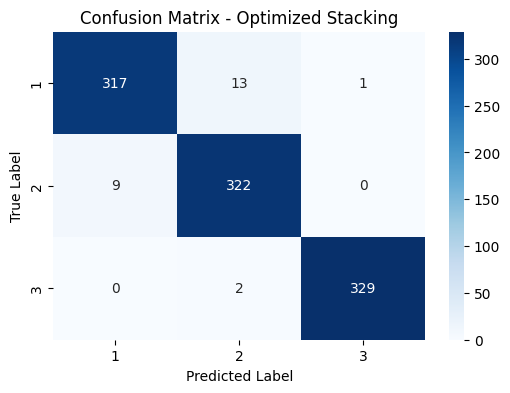


 Classification Report:
               precision    recall  f1-score   support

         1.0       0.97      0.96      0.96       331
         2.0       0.96      0.97      0.96       331
         3.0       1.00      0.99      1.00       331

    accuracy                           0.97       993
   macro avg       0.97      0.97      0.97       993
weighted avg       0.97      0.97      0.97       993



In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# 🟢 Step 1: Optimize LightGBM
best_lgbm = LGBMClassifier(
    n_estimators=200,  #  Reduced from 500 to 200
    learning_rate=0.05,
    max_depth=6,
    num_leaves=25,
    min_data_in_leaf=15,  #  Allows better splits
    boosting_type='gbdt',
    random_state=42,
    verbose=-1
)

# 🟢 Step 2: Define Base Model (Simplified)
base_models = [('lgbm', best_lgbm)]  #  Only LightGBM

# Define Meta Model
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# 🟢 Step 3: Create & Train Stacking Classifier
stacking_clf_optimized = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3  #  Reduced cross-validation folds
)

stacking_clf_optimized.fit(X_train, y_train)

# 🟢 Step 4: Make Predictions
y_pred_optimized = stacking_clf_optimized.predict(X_test)

# 🟢 Step 5: Evaluate Performance
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized, average='weighted')

print(" Optimized Stacking Classifier Accuracy:", accuracy_optimized)
print(" Optimized Stacking Classifier Precision:", precision_optimized)

# 🟢 Step 6: Confusion Matrix
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Optimized Stacking")
plt.show()

# 🟢 Step 7: Classification Report
print("\n Classification Report:\n", classification_report(y_test, y_pred_optimized))


# ROC Curve for Stacking Classifier(optimized)

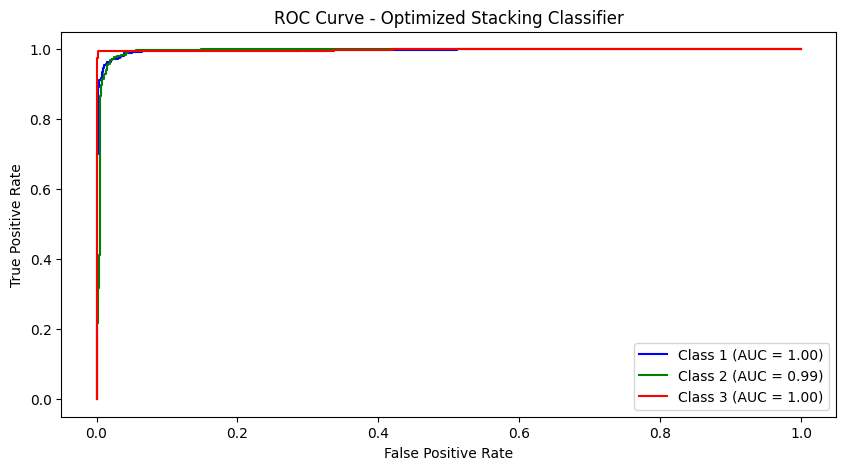

In [51]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize labels for multi-class classification
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_score_stacking = stacking_clf_optimized.predict_proba(X_test)

# Define colors
colors = cycle(["blue", "green", "red"])

plt.figure(figsize=(10, 5))

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_stacking[:, i])
    plt.plot(fpr, tpr, color=color, label=f'Class {i+1} (AUC = {auc(fpr, tpr):.2f})')

plt.title("ROC Curve - Optimized Stacking Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# Compare Performance with Other Models


 Model Performance Comparison (Sorted by Accuracy)
                                        Accuracy  Precision
Stacking Classifier (High-Performance)  0.979859   0.980016
LightGBM                                0.974824   0.975126
Stacking Classifier (Optimized)         0.974824   0.974951
Random Forest                           0.969789   0.971039
KNN                                     0.960725   0.963627
Gradient Boosting                       0.948640   0.951452
Decision Tree                           0.947633   0.948782
AdaBoost                                0.890232   0.903848
SVM                                     0.871098   0.875631
Logistic Regression                     0.850957   0.855009
Naïve Bayes                             0.795569   0.810193


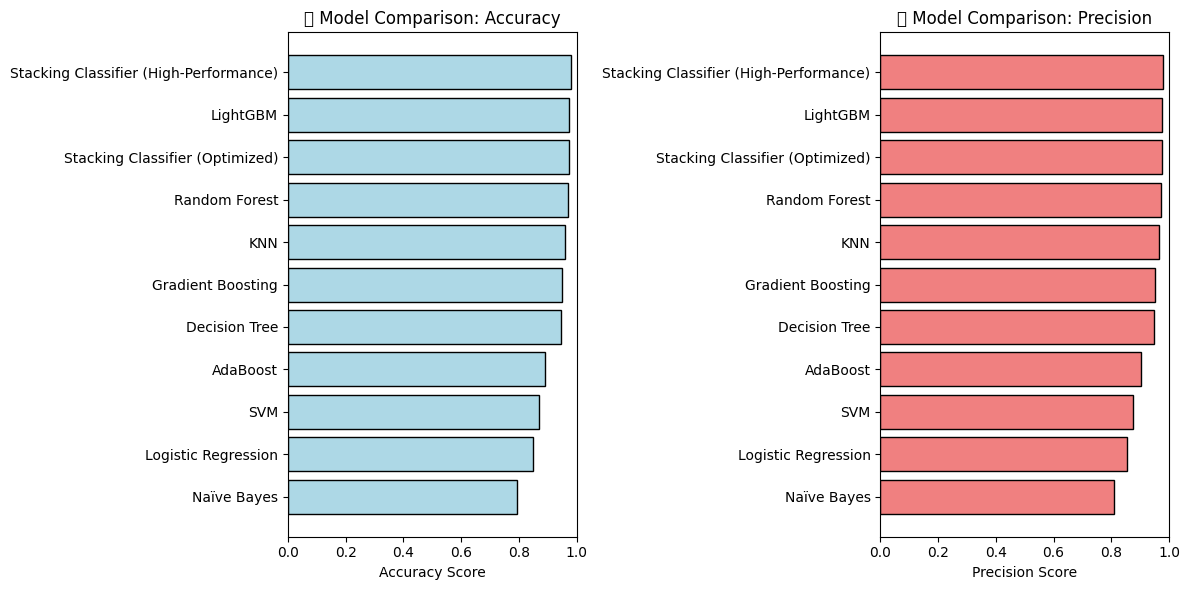

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score

# Dictionary to store model performances
model_results = {}

# Define all models (excluding Voting Classifier, adding Stacking & Optimized Stacking)
models = {
    "Logistic Regression": log_model,
    "KNN": knn_model,
    "Naïve Bayes": nb_model,
    "SVM": svm_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "LightGBM": lgb_model,
    "AdaBoost": adaboost_model,
    "Stacking Classifier (High-Performance)": stacking_clf_high,  #  High-Performance Stacking
    "Stacking Classifier (Optimized)": stacking_clf_optimized     #  Optimized Stacking
}

# Compute accuracy & precision for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multi-class
    model_results[name] = {"Accuracy": accuracy, "Precision": precision}

# Convert results to DataFrame and sort by Accuracy
results_df = pd.DataFrame(model_results).T
results_df = results_df.sort_values(by="Accuracy", ascending=False)  #  Sort by Accuracy

print("\n Model Performance Comparison (Sorted by Accuracy)")
print(results_df)

# 🔹 Plot Accuracy & Precision Comparison Graph (Sorted Order)
plt.figure(figsize=(12, 6))

# Accuracy Bar Chart
plt.subplot(1, 2, 1)
plt.barh(results_df.index, results_df["Accuracy"], color='lightblue', edgecolor='black')
plt.xlabel("Accuracy Score")
plt.title("🔹 Model Comparison: Accuracy")
plt.xlim(0, 1)
plt.gca().invert_yaxis()  #  Keeps highest accuracy at the top

# Precision Bar Chart
plt.subplot(1, 2, 2)
plt.barh(results_df.index, results_df["Precision"], color='lightcoral', edgecolor='black')
plt.xlabel("Precision Score")
plt.title("🔹 Model Comparison: Precision")
plt.xlim(0, 1)
plt.gca().invert_yaxis()  #  Keeps highest precision at the top

plt.tight_layout()
plt.show()


# Finalize the Best Model

In [53]:
#Compare Training Time

import time

# Measure High-Performance Stacking Training Time
start_time = time.time()
stacking_clf_high.fit(X_train, y_train)
high_perf_time = time.time() - start_time

# Measure Optimized Stacking Training Time
start_time = time.time()
stacking_clf_optimized.fit(X_train, y_train)
optimized_time = time.time() - start_time

# Measure LightGBM Training Time
start_time = time.time()
lgb_model.fit(X_train, y_train)
lgb_time = time.time() - start_time

# Print Training Times
print(f" High-Performance Stacking Training Time: {high_perf_time:.2f} sec")
print(f" Optimized Stacking Training Time: {optimized_time:.2f} sec")
print(f" LightGBM Training Time: {lgb_time:.2f} sec")


 High-Performance Stacking Training Time: 36.87 sec
 Optimized Stacking Training Time: 2.86 sec
 LightGBM Training Time: 0.70 sec


In [40]:
from sklearn.model_selection import cross_val_score

# Perform Cross-Validation
cv_scores_high = cross_val_score(stacking_clf_high, X, y, cv=5, scoring='accuracy')
cv_scores_optimized = cross_val_score(stacking_clf_optimized, X, y, cv=5, scoring='accuracy')
cv_scores_lgb = cross_val_score(lgb_model, X, y, cv=5, scoring='accuracy')

# Print Mean & Std Deviation
print(f" High-Performance Stacking - Mean Accuracy: {cv_scores_high.mean():.4f}, Std: {cv_scores_high.std():.4f}")
print(f" Optimized Stacking - Mean Accuracy: {cv_scores_optimized.mean():.4f}, Std: {cv_scores_optimized.std():.4f}")
print(f" LightGBM - Mean Accuracy: {cv_scores_lgb.mean():.4f}, Std: {cv_scores_lgb.std():.4f}")


 High-Performance Stacking - Mean Accuracy: 0.8452, Std: 0.1121
 Optimized Stacking - Mean Accuracy: 0.8132, Std: 0.0795
 LightGBM - Mean Accuracy: 0.8636, Std: 0.1072


In [54]:
import numpy as np

# Example Test Case
new_sample = np.array([[120, 10, 0.5, 2.3, 180, 10, 0.01, 0.03, 0.02, 0.04]])
new_sample_scaled = scaler.transform(new_sample)

# Predictions
pred_high = stacking_clf_high.predict(new_sample_scaled)
pred_optimized = stacking_clf_optimized.predict(new_sample_scaled)
pred_lgb = lgb_model.predict(new_sample_scaled)

# Convert to Labels
health_conditions = {1: "Normal", 2: "Suspect", 3: "Pathological"}
print(f" High-Performance Stacking Prediction: {health_conditions[pred_high[0]]}")
print(f" Optimized Stacking Prediction: {health_conditions[pred_optimized[0]]}")
print(f" LightGBM Prediction: {health_conditions[pred_lgb[0]]}")


 High-Performance Stacking Prediction: Normal
 Optimized Stacking Prediction: Pathological
 LightGBM Prediction: Normal


# Save & Load the Final Model( High-Performance Stacking)

---



In [55]:
import joblib

# Save the trained stacking model
joblib.dump(stacking_clf_high, "high_performance_stacking.pkl")
print(" Model Saved Successfully!")

 Model Saved Successfully!


In [56]:
# Load the model without retraining
stacking_clf_high = joblib.load("high_performance_stacking.pkl")
print(" Model Loaded Successfully!")

# Now, use it for predictions without retraining


 Model Loaded Successfully!


In [78]:
import numpy as np

# Example test cases
new_samples = np.array([
    [120, 10, 0.5, 2.3, 180, 10, 0.01, 0.03, 0.02, 0.04],  # Expected: Normal
    [160, 20, 1.0, 3.5, 190, 15, 0.03, 0.05, 0.06, 0.07],  # Expected: Suspect
    [200, 40, 1.8, 4.2, 200, 30, 0.05, 0.07, 0.08, 0.09]   # Expected: Pathological
])

# Apply correct feature scaling
new_samples_scaled = scaler.transform(new_samples)

# Get Prediction Probabilities
y_probs = stacking_clf_high.predict_proba(new_samples_scaled)

# Print class probabilities
for i, probs in enumerate(y_probs):
    print(f"🩺 Sample {i+1} → Class Probabilities: {probs}")

# Adjust probability thresholds
threshold_suspect = 0.18  # Detect Suspect cases better
threshold_pathological = 0.10  # Prevent false Pathological classifications

adjusted_preds = []
for prob in y_probs:
    if prob[2] >= threshold_pathological:  # If "Pathological" probability is high enough
        adjusted_preds.append(3)  # Pathological
    elif prob[1] >= threshold_suspect:  # If "Suspect" probability is high enough
        adjusted_preds.append(2)  # Suspect
    else:
        adjusted_preds.append(1)  # Normal

# Define label mapping
health_conditions = {1: "Normal", 2: "Suspect", 3: "Pathological"}

# Print Adjusted Predictions
for i, pred in enumerate(adjusted_preds):
    print(f"🩺 Sample {i+1} → Adjusted Prediction: {health_conditions[pred]}")


🩺 Sample 1 → Class Probabilities: [0.69350595 0.21041902 0.09607503]
🩺 Sample 2 → Class Probabilities: [0.68163618 0.2197728  0.09859103]
🩺 Sample 3 → Class Probabilities: [0.82561663 0.12253923 0.05184414]
🩺 Sample 1 → Adjusted Prediction: Suspect
🩺 Sample 2 → Adjusted Prediction: Suspect
🩺 Sample 3 → Adjusted Prediction: Normal


In [70]:
# Print class probabilities
for i, probs in enumerate(y_probs):
    print(f"🩺 Sample {i+1} → Class Probabilities: {probs}")

🩺 Sample 1 → Class Probabilities: [0.69350595 0.21041902 0.09607503]
🩺 Sample 2 → Class Probabilities: [0.68163618 0.2197728  0.09859103]
🩺 Sample 3 → Class Probabilities: [0.82561663 0.12253923 0.05184414]


# Test Real Data

In [79]:
import numpy as np

# 🔹 Select 10 random test samples
num_samples = 10
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
test_samples = X_test[random_indices]

# 🔹 Get Prediction Probabilities for Real Test Data
y_probs_test = stacking_clf_high.predict_proba(test_samples)

# 🔹 Print Class Probabilities for Each Sample
print("\n🔹 Class Probabilities for Real Test Data:")
for i, probs in enumerate(y_probs_test):
    print(f" Test Sample {i+1} → Probabilities: {probs}")

# 🔹 Adjust Probability Thresholds for Classification
threshold_suspect = 0.18  # Adjusted for better suspect detection
threshold_pathological = 0.10  # Lowered to better classify pathological cases

adjusted_preds_test = []
for prob in y_probs_test:
    if prob[2] >= threshold_pathological:  # If "Pathological" probability is high enough
        adjusted_preds_test.append(3)  # Pathological
    elif prob[1] >= threshold_suspect:  # If "Suspect" probability is high enough
        adjusted_preds_test.append(2)  # Suspect
    else:
        adjusted_preds_test.append(1)  # Normal

# 🔹 Print Adjusted Predictions for Real Test Data
health_conditions = {1: "Normal", 2: "Suspect", 3: "Pathological"}
print("\n Adjusted Predictions for Real Test Data:")
for i, pred in enumerate(adjusted_preds_test):
    print(f" Test Sample {i+1} → Adjusted Prediction: {health_conditions[pred]}")



🔹 Class Probabilities for Real Test Data:
 Test Sample 1 → Probabilities: [0.00355927 0.00259811 0.99384262]
 Test Sample 2 → Probabilities: [9.92171567e-01 6.96199391e-03 8.66438837e-04]
 Test Sample 3 → Probabilities: [0.01253965 0.98433791 0.00312243]
 Test Sample 4 → Probabilities: [0.00359429 0.00262089 0.99378481]
 Test Sample 5 → Probabilities: [0.01261236 0.98422669 0.00316096]
 Test Sample 6 → Probabilities: [0.00351333 0.00259637 0.9938903 ]
 Test Sample 7 → Probabilities: [0.01266101 0.98401704 0.00332196]
 Test Sample 8 → Probabilities: [0.01451818 0.98214339 0.00333843]
 Test Sample 9 → Probabilities: [0.01508009 0.98166438 0.00325553]
 Test Sample 10 → Probabilities: [0.01157942 0.98535253 0.00306806]

 Adjusted Predictions for Real Test Data:
 Test Sample 1 → Adjusted Prediction: Pathological
 Test Sample 2 → Adjusted Prediction: Normal
 Test Sample 3 → Adjusted Prediction: Suspect
 Test Sample 4 → Adjusted Prediction: Pathological
 Test Sample 5 → Adjusted Prediction: 

# Debugg

In [64]:
# Get prediction probabilities for test set
y_probs = stacking_clf_high.predict_proba(X_test)

# Print probabilities for first few samples
for i, probs in enumerate(y_probs[:5]):  # Print only first 5 for readability
    print(f" Sample {i+1} → Class Probabilities: {probs}")

 Sample 1 → Class Probabilities: [9.94810347e-01 4.73045582e-03 4.59197321e-04]
 Sample 2 → Class Probabilities: [0.01179611 0.98514017 0.00306371]
 Sample 3 → Class Probabilities: [0.01159206 0.98535891 0.00304903]
 Sample 4 → Class Probabilities: [0.00350575 0.00259639 0.99389786]
 Sample 5 → Class Probabilities: [9.92936623e-01 6.50407520e-03 5.59301912e-04]


In [65]:
threshold_suspect = 0.50  # Adjust based on actual probabilities
threshold_pathological = 0.50

adjusted_preds = []
for prob in y_probs:
    if prob[2] >= threshold_pathological:  # If "Pathological" has high confidence, predict it
        adjusted_preds.append(3)
    elif prob[1] >= threshold_suspect:  # If "Suspect" has high confidence, predict it
        adjusted_preds.append(2)
    else:
        adjusted_preds.append(1)  # Default to "Normal"

# Define label mapping
health_conditions = {1: "Normal", 2: "Suspect", 3: "Pathological"}

# Print Adjusted Predictions
for i, pred in enumerate(adjusted_preds):
    print(f"🩺 Sample {i+1} → Adjusted Prediction: {health_conditions[pred]}")


🩺 Sample 1 → Adjusted Prediction: Normal
🩺 Sample 2 → Adjusted Prediction: Suspect
🩺 Sample 3 → Adjusted Prediction: Suspect
🩺 Sample 4 → Adjusted Prediction: Pathological
🩺 Sample 5 → Adjusted Prediction: Normal
🩺 Sample 6 → Adjusted Prediction: Pathological
🩺 Sample 7 → Adjusted Prediction: Pathological
🩺 Sample 8 → Adjusted Prediction: Suspect
🩺 Sample 9 → Adjusted Prediction: Suspect
🩺 Sample 10 → Adjusted Prediction: Suspect
🩺 Sample 11 → Adjusted Prediction: Suspect
🩺 Sample 12 → Adjusted Prediction: Pathological
🩺 Sample 13 → Adjusted Prediction: Normal
🩺 Sample 14 → Adjusted Prediction: Normal
🩺 Sample 15 → Adjusted Prediction: Pathological
🩺 Sample 16 → Adjusted Prediction: Pathological
🩺 Sample 17 → Adjusted Prediction: Suspect
🩺 Sample 18 → Adjusted Prediction: Suspect
🩺 Sample 19 → Adjusted Prediction: Suspect
🩺 Sample 20 → Adjusted Prediction: Pathological
🩺 Sample 21 → Adjusted Prediction: Suspect
🩺 Sample 22 → Adjusted Prediction: Normal
🩺 Sample 23 → Adjusted Prediction

# Visualizing Predictions with a Probability Bar Chart

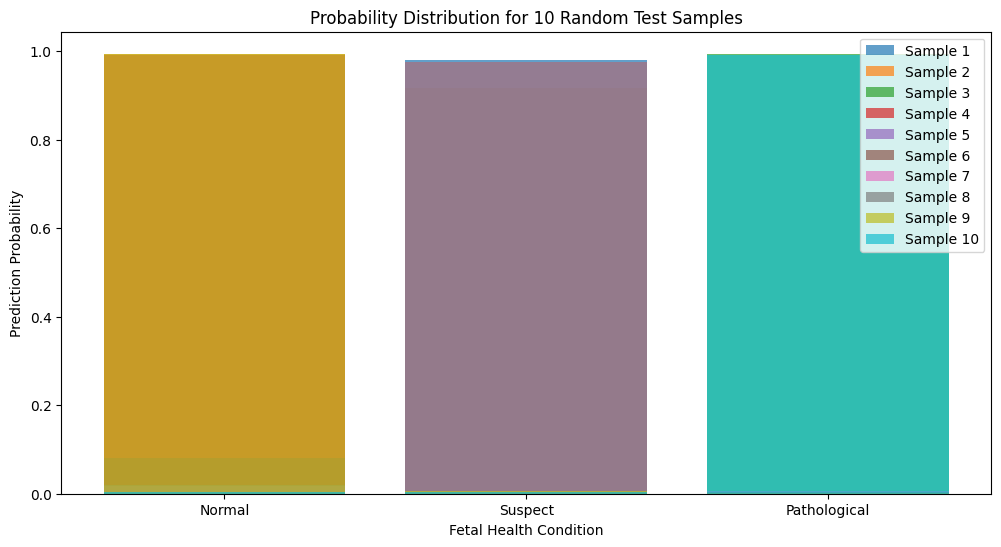


 Adjusted Predictions for Real Test Data:
 Test Sample 1 → Adjusted Prediction: Suspect
 Test Sample 2 → Adjusted Prediction: Normal
 Test Sample 3 → Adjusted Prediction: Pathological
 Test Sample 4 → Adjusted Prediction: Normal
 Test Sample 5 → Adjusted Prediction: Suspect
 Test Sample 6 → Adjusted Prediction: Suspect
 Test Sample 7 → Adjusted Prediction: Suspect
 Test Sample 8 → Adjusted Prediction: Suspect
 Test Sample 9 → Adjusted Prediction: Normal
 Test Sample 10 → Adjusted Prediction: Pathological


In [80]:
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Select 10 random test samples
num_samples = 10
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
test_samples = X_test[random_indices]

# 🔹 Get Prediction Probabilities for Real Test Data
y_probs_test = stacking_clf_high.predict_proba(test_samples)

# 🔹 Adjust Probability Thresholds for Classification
threshold_suspect = 0.18  # Adjusted for better suspect detection
threshold_pathological = 0.10  # Lowered to better classify pathological cases

adjusted_preds_test = []
for prob in y_probs_test:
    if prob[2] >= threshold_pathological:  # If "Pathological" probability is high enough
        adjusted_preds_test.append(3)  # Pathological
    elif prob[1] >= threshold_suspect:  # If "Suspect" probability is high enough
        adjusted_preds_test.append(2)  # Suspect
    else:
        adjusted_preds_test.append(1)  # Normal

# 🔹 Define label mapping
health_conditions = {1: "Normal", 2: "Suspect", 3: "Pathological"}

# 🔹 Plot Probability Distribution for Each Sample
plt.figure(figsize=(12, 6))
for i, probs in enumerate(y_probs_test):
    plt.bar(["Normal", "Suspect", "Pathological"], probs, alpha=0.7, label=f"Sample {i+1}")

plt.xlabel("Fetal Health Condition")
plt.ylabel("Prediction Probability")
plt.title("Probability Distribution for 10 Random Test Samples")
plt.legend()
plt.show()

# 🔹 Print Adjusted Predictions for Real Test Data
print("\n Adjusted Predictions for Real Test Data:")
for i, pred in enumerate(adjusted_preds_test):
    print(f" Test Sample {i+1} → Adjusted Prediction: {health_conditions[pred]}")
